# ASK PATH STDIN, THEN PLOT FORCE_Z

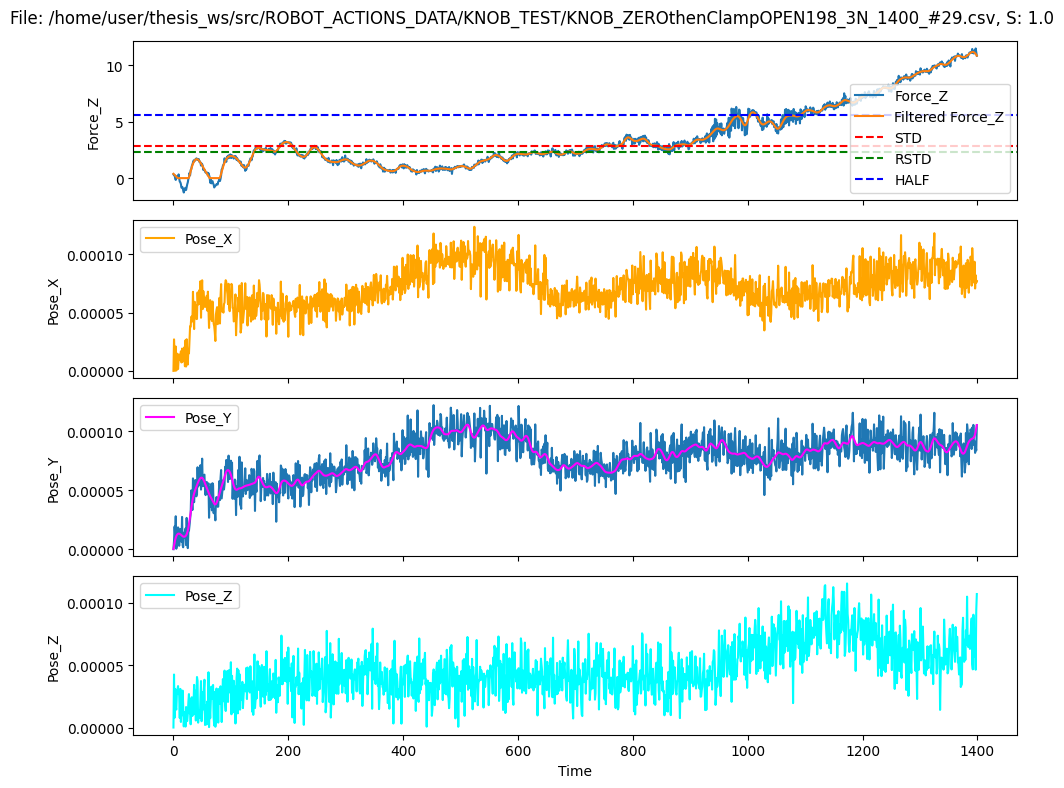

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy.signal import butter, filtfilt


# Function to plot the "Force_Z" column from a CSV file
def plot_force_z(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    
    # Check if "Force_Z" column exists in the DataFrame
    if 'Force_Z' not in df.columns:
        print("Error: 'Force_Z' column not found in the CSV file.")
        return
    
    ys = df.loc[0, 'Y']
    force_z = df['Force_Z']
    pose_x = np.abs(df['Pose_X'][0]-df['Pose_X'])
    pose_y = np.abs(df['Pose_Y'][0]-df['Pose_Y'])
    pose_z = np.abs(df['Pose_Z'][0]-df['Pose_Z'])
    
    # Filtering Force_Z signal
    nyq_freq = 0.5 * 500
    normalized_cutoff = 25 / nyq_freq
    b, a = butter(2, normalized_cutoff, btype='low')
    filtered_force_z = filtfilt(b, a, force_z)
    filtered_force_z[filtered_force_z < 0] = 0
    pose_yf = filtfilt(b, a, pose_y)
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    axs[0].plot(force_z, label='Force_Z')
    axs[0].plot(filtered_force_z, label='Filtered Force_Z')
    axs[0].axhline(y=np.std(filtered_force_z), color='r', linestyle='--', label='STD')
    axs[0].axhline(y=np.std(filtered_force_z) * 0.82, color='g', linestyle='--', label='RSTD')
    axs[0].axhline(y=np.max(filtered_force_z) / 2, color='b', linestyle='--', label='HALF')
    axs[0].legend()
    axs[0].set_ylabel('Force_Z')
    
    axs[1].plot(pose_x, color='orange', label='Pose_X')
    axs[1].legend()
    axs[1].set_ylabel('Pose_X')
    
    axs[2].plot(pose_y)
    axs[2].plot(pose_yf, color='magenta', label='Pose_Y')
    axs[2].legend()
    axs[2].set_ylabel('Pose_Y')
    
    axs[3].plot(pose_z, color='cyan', label='Pose_Z')
    axs[3].legend()
    axs[3].set_ylabel('Pose_Z')
    
    plt.suptitle(f'File: {csv_path}, S: {ys}')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

# Prompt the user for the path to the CSV file
csv_path = input("Enter the path to the CSV file: ")

# Plot the "Force_Z" column
plot_force_z(csv_path)


## 20 RANDOM PLOTS AMONG ALL SUBFOLDERS

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

def plot_random_files(folder_path, num_files=20):
    """
    Plot the 'Force_Z' column from random CSV files in the specified folder and its subfolders.
    
    Parameters:
    - folder_path: path to the folder containing CSV files
    - num_files: number of random files to plot (default is 20)
    """
    # List to store file paths
    file_paths = []
    
    # Traverse the folder structure
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv'):
                file_paths.append(os.path.join(root, file))
    
    # Select random files
    random_files = random.sample(file_paths, num_files)
    
    # Plot from each random file
    for i, file_path in enumerate(random_files, 1):
        try:
            # Read CSV file
            df = pd.read_csv(file_path)
            
            # Check if 'Force_Z' and 'Y' columns exist
            if 'Force_Z' in df.columns and 'Y' in df.columns:
                
                # Extract first element of 'Y' column
                first_y_value = df['Y'].iloc[0]
                
                plt.figure(figsize=(10, 6))
                
                # Plot 'Force_Z' column
                plt.plot(df['Force_Z'], label='Force_Z', color='blue')
                
                # Get subfolder name
                subfolder_name = os.path.basename(os.path.dirname(file_path))
                
                plt.title(f'Subfolder: {subfolder_name} - Force_Z from {os.path.basename(file_path)} (Y = {first_y_value})')
                plt.xlabel('Sample')
                plt.ylabel('Force_Z')
                plt.legend()
                plt.grid(True)
                
                # Show plot
                plt.show()
                
                # Close current plot
                plt.close()
                
                # Pause for 3 seconds
                if i < num_files:
                    print(f"Plotting next file in 3 seconds... ({num_files - i} files left)")
                    time.sleep(3)
                
        except Exception as e:
            print(f"Error plotting {file_path}: {e}")

# Folder path
folder_path = '/home/user/thesis_ws/src/ROBOT_ACTIONS_DATA/FLAP'

# Plot random files
plot_random_files(folder_path)


# PLOT TORQUES

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Function to plot the "Torque_Z", "Torque_X", "Torque_Y", "Pose_Rx", "Pose_Ry", and "Pose_Rz" columns from a CSV file
def plot_torque_and_pose(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    
    # Check if required columns exist in the DataFrame
    required_columns = ["Torque_Z", "Torque_X", "Torque_Y", "Pose_Rx", "Pose_Ry", "Pose_Rz"]
    for column in required_columns:
        if column not in df.columns:
            print(f"Error: '{column}' column not found in the CSV file.")
            return
    
    ys = df.loc[0, 'N']
    torque_z = df['Torque_Z']
    torque_x = df['Torque_X']
    torque_y = df['Torque_Y']
    pose_rx = np.abs(df['Pose_Rx'][0]-df['Pose_Rx'])
    pose_ry = np.abs(df['Pose_Ry'][0]-df['Pose_Ry'])
    pose_rz = np.abs(df['Pose_Rz'][0]-df['Pose_Rz'])
    
    # Filtering Torque_Z, Torque_X, and Torque_Y signals
    nyq_freq = 0.5 * 500
    normalized_cutoff = 25 / nyq_freq
    b, a = butter(2, normalized_cutoff, btype='low')
    filtered_torque_z = filtfilt(b, a, torque_z)
    filtered_torque_x = filtfilt(b, a, torque_x)
    filtered_torque_y = filtfilt(b, a, torque_y)
    
    # Plotting
    fig, axs = plt.subplots(6, 1, figsize=(10, 12), sharex=True)
    axs[0].plot(torque_z, label='Torque_Z')
    axs[0].plot(filtered_torque_z, label='Filtered Torque_Z')
    axs[0].axhline(y=np.std(filtered_torque_z), color='r', linestyle='--', label='STD')
    axs[0].axhline(y=np.std(filtered_torque_z) * 0.82, color='g', linestyle='--', label='RSTD')
    axs[0].axhline(y=np.max(filtered_torque_z) / 2, color='b', linestyle='--', label='HALF')
    axs[0].legend()
    axs[0].set_ylabel('Torque_Z')
    
    axs[1].plot(torque_x, color='orange', label='Torque_X')
    axs[1].plot(filtered_torque_x, color='red', label='Filtered Torque_X')
    axs[1].legend()
    axs[1].set_ylabel('Torque_X')
    
    axs[2].plot(torque_y, color='green', label='Torque_Y')
    axs[2].plot(filtered_torque_y, color='blue', label='Filtered Torque_Y')
    axs[2].legend()
    axs[2].set_ylabel('Torque_Y')
    
    axs[3].plot(pose_rx, color='purple', label='Pose_Rx')
    axs[3].legend()
    axs[3].set_ylabel('Pose_Rx')
    
    axs[4].plot(pose_ry, color='brown', label='Pose_Ry')
    axs[4].legend()
    axs[4].set_ylabel('Pose_Ry')
    
    axs[5].plot(pose_rz, color='cyan', label='Pose_Rz')
    axs[5].legend()
    axs[5].set_ylabel('Pose_Rz')
    
    plt.suptitle(f'File: {csv_path}, S: {ys}')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

# Prompt the user for the path to the CSV file
csv_path = input("Enter the path to the CSV file: ")

# Plot the "Torque_Z", "Torque_X", "Torque_Y", "Pose_Rx", "Pose_Ry", and "Pose_Rz" columns
plot_torque_and_pose(csv_path)

# Plot TORQUES + QW3

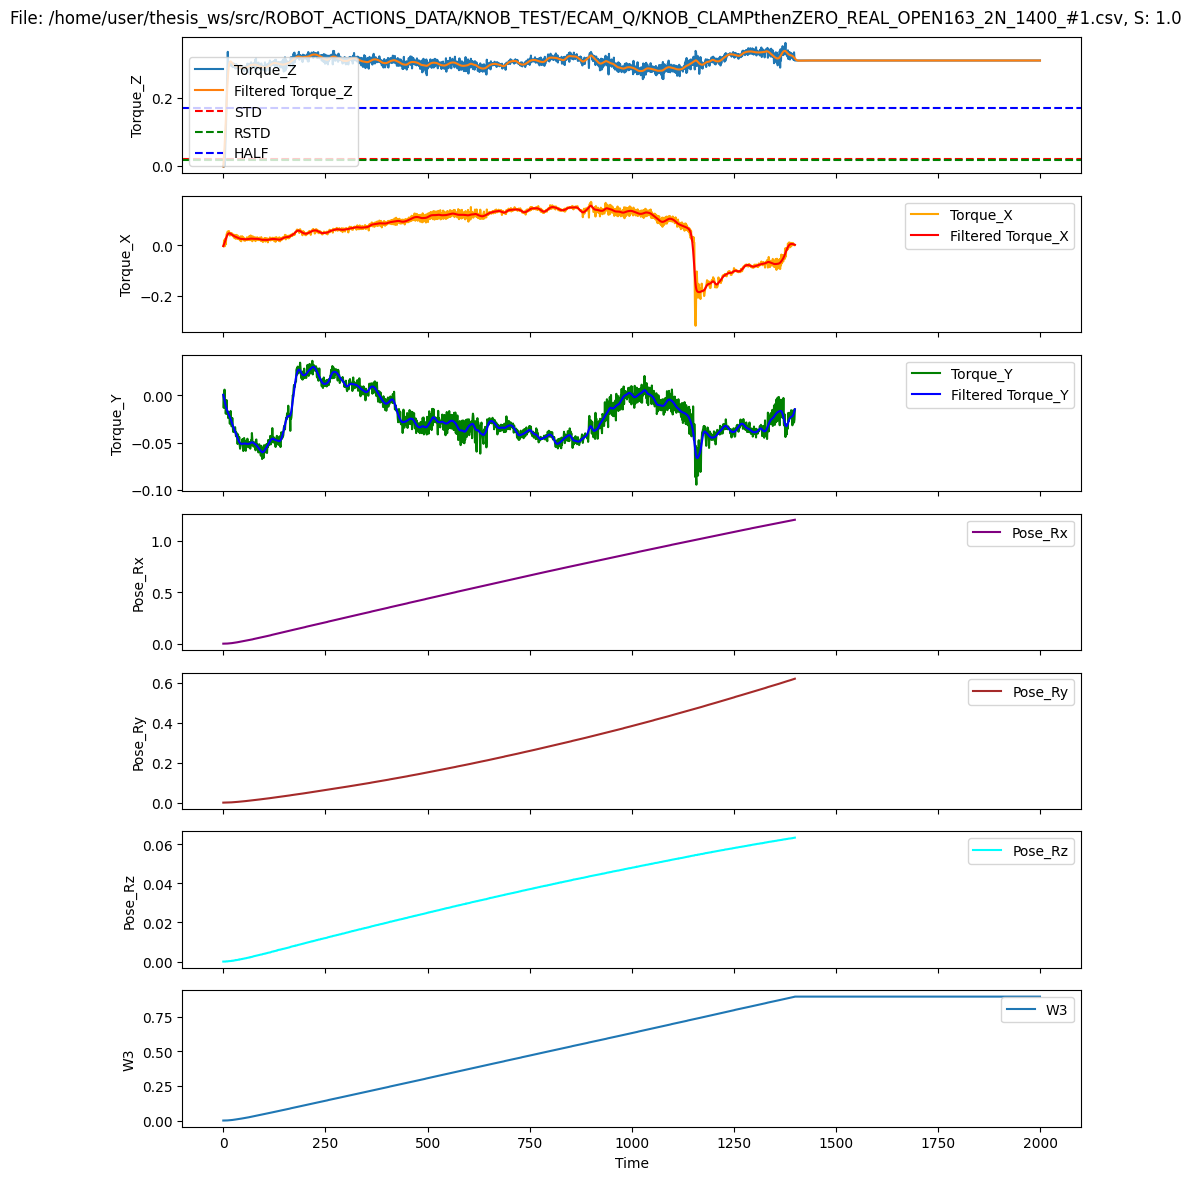

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Function to plot the "Torque_Z", "Torque_X", "Torque_Y", "Pose_Rx", "Pose_Ry", and "Pose_Rz" columns from a CSV file
def plot_torque_and_pose(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    
    # Check if required columns exist in the DataFrame
    required_columns = ["Torque_Z", "Torque_X", "Torque_Y", "Pose_Rx", "Pose_Ry", "Pose_Rz", "Q_w3"]
    for column in required_columns:
        if column not in df.columns:
            print(f"Error: '{column}' column not found in the CSV file.")
            return
    
    ys = df.loc[0, 'N']
    torque_z = df['Torque_Z']
    torque_x = df['Torque_X']
    torque_y = df['Torque_Y']
    pose_rx = np.abs(df['Pose_Rx'][0]-df['Pose_Rx'])
    pose_ry = np.abs(df['Pose_Ry'][0]-df['Pose_Ry'])
    pose_rz = np.abs(df['Pose_Rz'][0]-df['Pose_Rz'])
    qw3 = np.abs(df['Q_w3'][0]-df['Q_w3'])
    
    # PREPROCESSING
    target_length = 2000
    if len(torque_z) < target_length:
        padding_length = target_length - len(torque_z)
        last_value = torque_z.iloc[-1]
        last_valueQ = qw3.iloc[-1]
        torque_z = np.pad(torque_z, (0, padding_length), mode='constant', constant_values=last_value)
        qw3 = np.pad(qw3, (0, padding_length), mode='constant', constant_values=last_valueQ)
    else:
        padded_signal = torque_z

    # Filtering Torque_Z, Torque_X, and Torque_Y signals
    nyq_freq = 0.5 * 500
    normalized_cutoff = 25 / nyq_freq
    b, a = butter(2, normalized_cutoff, btype='low')
    filtered_torque_z = filtfilt(b, a, torque_z)
    filtered_torque_x = filtfilt(b, a, torque_x)
    filtered_torque_y = filtfilt(b, a, torque_y)
    
    # Plotting
    fig, axs = plt.subplots(7, 1, figsize=(10, 12), sharex=True)
    axs[0].plot(torque_z, label='Torque_Z')
    axs[0].plot(filtered_torque_z, label='Filtered Torque_Z')
    axs[0].axhline(y=np.std(filtered_torque_z), color='r', linestyle='--', label='STD')
    axs[0].axhline(y=np.std(filtered_torque_z) * 0.82, color='g', linestyle='--', label='RSTD')
    axs[0].axhline(y=np.max(filtered_torque_z) / 2, color='b', linestyle='--', label='HALF')
    axs[0].legend()
    axs[0].set_ylabel('Torque_Z')
    
    axs[1].plot(torque_x, color='orange', label='Torque_X')
    axs[1].plot(filtered_torque_x, color='red', label='Filtered Torque_X')
    axs[1].legend()
    axs[1].set_ylabel('Torque_X')
    
    axs[2].plot(torque_y, color='green', label='Torque_Y')
    axs[2].plot(filtered_torque_y, color='blue', label='Filtered Torque_Y')
    axs[2].legend()
    axs[2].set_ylabel('Torque_Y')
    
    axs[3].plot(pose_rx, color='purple', label='Pose_Rx')
    axs[3].legend()
    axs[3].set_ylabel('Pose_Rx')
    
    axs[4].plot(pose_ry, color='brown', label='Pose_Ry')
    axs[4].legend()
    axs[4].set_ylabel('Pose_Ry')
    
    axs[5].plot(pose_rz, color='cyan', label='Pose_Rz')
    axs[5].legend()
    axs[5].set_ylabel('Pose_Rz')

    axs[6].plot(qw3, label='W3')
    axs[6].legend()
    axs[6].set_ylabel('W3')
    
    plt.suptitle(f'File: {csv_path}, S: {ys}')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

# Prompt the user for the path to the CSV file
csv_path = input("Enter the path to the CSV file: ")

# Plot the "Torque_Z", "Torque_X", "Torque_Y", "Pose_Rx", "Pose_Ry", and "Pose_Rz" columns
plot_torque_and_pose(csv_path)

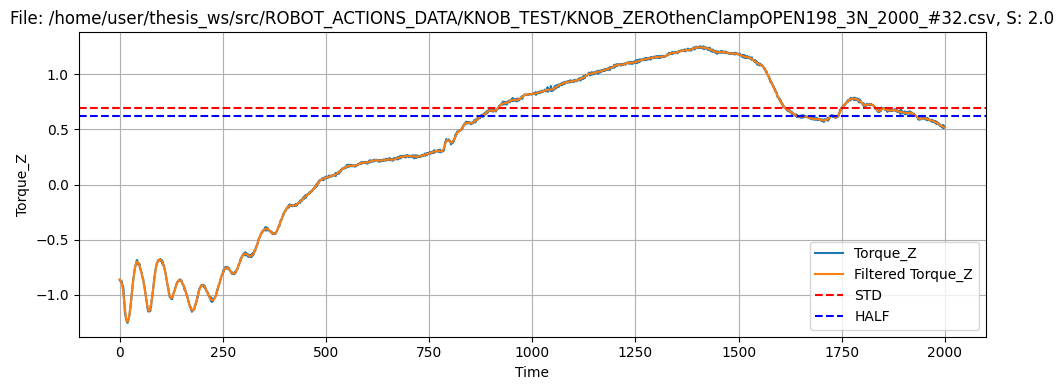

In [6]:

def plot_torque_z(csv_path):
    df = pd.read_csv(csv_path)
    if "Torque_Z" not in df.columns:
        print("Error: 'Torque_Z' column not found in the CSV file.")
        return
    
    ys = df.loc[0, 'Y']
    torque_z = df['Torque_Z']
    
    # Filtering Torque_Z signal
    nyq_freq = 0.5 * 500
    normalized_cutoff = 30 / nyq_freq
    b, a = butter(2, normalized_cutoff, btype='low')
    filtered_torque_z = filtfilt(b, a, torque_z)
    
    # Plotting Torque_Z
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(torque_z, label='Torque_Z')
    ax.plot(filtered_torque_z, label='Filtered Torque_Z')
    ax.axhline(y=np.std(filtered_torque_z), color='r', linestyle='--', label='STD')
    #ax.axhline(y=np.std(filtered_torque_z) * 0.82, color='g', linestyle='--', label='RSTD')
    ax.axhline(y=np.max(filtered_torque_z) / 2, color='b', linestyle='--', label='HALF')
    ax.legend()
    ax.set_ylabel('Torque_Z')
    ax.set_xlabel('Time')
    ax.grid(True)
    plt.title(f'File: {csv_path}, S: {ys}')
    plt.tight_layout()
    plt.show()


plot_torque_z(csv_path)

# PLOT FORCES AND TORQUES GIVEN A FILE

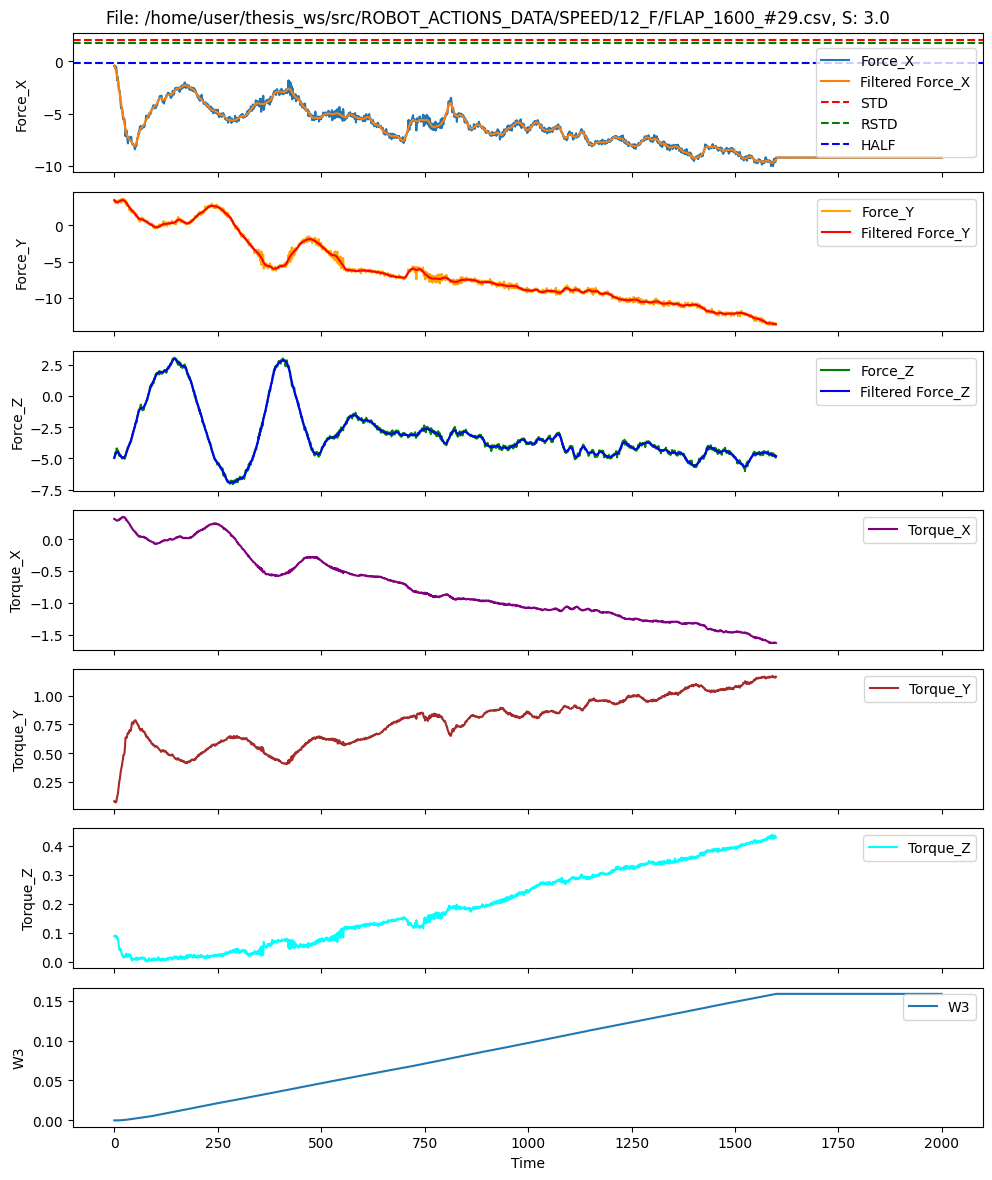

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Function to plot the "Force_X", "Force_Y", "Force_Z", "Torque_X", "Torque_Y", and "Torque_Z" columns from a CSV file
def plot_torque_and_pose(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    
    # Check if required columns exist in the DataFrame
    required_columns = ["Force_X", "Force_Y", "Force_Z", "Torque_X", "Torque_Y", "Torque_Z", "Q_w3"]
    for column in required_columns:
        if column not in df.columns:
            print(f"Error: '{column}' column not found in the CSV file.")
            return
    
    ys = df.loc[0, 'Y']
    Force_X   = df['Force_X']
    Force_Y   = df['Force_Y']
    Force_Z   = df['Force_Z']
    Torque_X  = df['Torque_X']
    Torque_Y  = df['Torque_Y']
    Torque_Z  = df['Torque_Z']
    qw3 = np.abs(df['Q_w3'][0]-df['Q_w3'])
    
    # PREPROCESSING
    target_length = 2000
    if len(Force_X) < target_length:
        padding_length = target_length - len(Force_X)
        last_value = Force_X.iloc[-1]
        last_valueQ = qw3.iloc[-1]
        Force_X = np.pad(Force_X, (0, padding_length), mode='constant', constant_values=last_value)
        qw3 = np.pad(qw3, (0, padding_length), mode='constant', constant_values=last_valueQ)
    else:
        padded_signal = Force_X

    # Filtering Force_X, Force_Y, and Force_Z signals
    nyq_freq = 0.5 * 500
    normalized_cutoff = 25 / nyq_freq
    b, a = butter(2, normalized_cutoff, btype='low')
    filtered_Force_X = filtfilt(b, a, Force_X)
    filtered_Force_Y = filtfilt(b, a, Force_Y)
    filtered_Force_Z = filtfilt(b, a, Force_Z)
    
    # Plotting
    fig, axs = plt.subplots(7, 1, figsize=(10, 12), sharex=True)
    axs[0].plot(Force_X, label='Force_X')
    axs[0].plot(filtered_Force_X, label='Filtered Force_X')
    axs[0].axhline(y=np.std(filtered_Force_X), color='r', linestyle='--', label='STD')
    axs[0].axhline(y=np.std(filtered_Force_X) * 0.82, color='g', linestyle='--', label='RSTD')
    axs[0].axhline(y=np.max(filtered_Force_X) / 2, color='b', linestyle='--', label='HALF')
    axs[0].legend()
    axs[0].set_ylabel('Force_X')
    
    axs[1].plot(Force_Y, color='orange', label='Force_Y')
    axs[1].plot(filtered_Force_Y, color='red', label='Filtered Force_Y')
    axs[1].legend()
    axs[1].set_ylabel('Force_Y')
    
    axs[2].plot(Force_Z, color='green', label='Force_Z')
    axs[2].plot(filtered_Force_Z, color='blue', label='Filtered Force_Z')
    axs[2].legend()
    axs[2].set_ylabel('Force_Z')
    
    axs[3].plot(Torque_X, color='purple', label='Torque_X')
    axs[3].legend()
    axs[3].set_ylabel('Torque_X')
    
    axs[4].plot(Torque_Y, color='brown', label='Torque_Y')
    axs[4].legend()
    axs[4].set_ylabel('Torque_Y')
    
    axs[5].plot(Torque_Z, color='cyan', label='Torque_Z')
    axs[5].legend()
    axs[5].set_ylabel('Torque_Z')

    axs[6].plot(qw3, label='W3')
    axs[6].legend()
    axs[6].set_ylabel('W3')
    
    plt.suptitle(f'File: {csv_path}, S: {ys}')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

# Prompt the user for the path to the CSV file
csv_path = input("Enter the path to the CSV file: ")

# Plot the "Force_X", "Force_Y", "Force_Z", "Torque_X", "Torque_Y", and "Torque_Z" columns
plot_torque_and_pose(csv_path)